In [18]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [19]:
#open csv with pandas
df02 = pd.read_csv("./data/ACS_16_5YR_DP02_with_ann.csv", low_memory=False)

In [20]:
# print columns
df02.columns

Index(['GEO.id', 'GEO.id2', 'GEO.display-label', 'HC01_VC03', 'HC02_VC03',
       'HC03_VC03', 'HC04_VC03', 'HC01_VC04', 'HC02_VC04', 'HC03_VC04',
       ...
       'HC03_VC216', 'HC04_VC216', 'HC01_VC217', 'HC02_VC217', 'HC03_VC217',
       'HC04_VC217', 'HC01_VC218', 'HC02_VC218', 'HC03_VC218', 'HC04_VC218'],
      dtype='object', length=611)

In [21]:
# see shape of data
df02.shape

(32990, 611)

In [22]:
# see column types
df02.dtypes

GEO.id               object
GEO.id2              object
GEO.display-label    object
HC01_VC03            object
HC02_VC03            object
HC03_VC03            object
HC04_VC03            object
HC01_VC04            object
HC02_VC04            object
HC03_VC04            object
HC04_VC04            object
HC01_VC05            object
HC02_VC05            object
HC03_VC05            object
HC04_VC05            object
HC01_VC06            object
HC02_VC06            object
HC03_VC06            object
HC04_VC06            object
HC01_VC07            object
HC02_VC07            object
HC03_VC07            object
HC04_VC07            object
HC01_VC08            object
HC02_VC08            object
HC03_VC08            object
HC04_VC08            object
HC01_VC09            object
HC02_VC09            object
HC03_VC09            object
                      ...  
HC03_VC208           object
HC04_VC208           object
HC01_VC209           object
HC02_VC209           object
HC03_VC209          

In [23]:
# print first 5 rows
df02.head()

GEO.id GEO.id2 GEO.display-label  \
0              Id     Id2         Geography   
1  8600000US01001   01001       ZCTA5 01001   
2  8600000US01002   01002       ZCTA5 01002   
3  8600000US01003   01003       ZCTA5 01003   
4  8600000US01005   01005       ZCTA5 01005   

                                         HC01_VC03  \
0  Estimate; HOUSEHOLDS BY TYPE - Total households   
1                                             7190   
2                                             9561   
3                                               26   
4                                             1840   

                                           HC02_VC03  \
0  Margin of Error; HOUSEHOLDS BY TYPE - Total ho...   
1                                                255   
2                                                447   
3                                                 21   
4                                                187   

                                        HC03_VC03  \
0  Percent; HOUSEHOLDS BY TYPE - Total households   
1                                            7190   
2                                            9561   
3                                              26   
4                                            1840   

                                           HC04_VC03  \
0  Percent Margin of Error; HOUSEHOLDS BY TYPE - ...   
1                                                (X)   
2                                                (X)   
3                                                (X)   
4                                                (X)   

                                           HC01_VC04  \
0  Estimate; HOUSEHOLDS BY TYPE - Total household...   
1                                               3943   
2                                               4626   
3                                                  0   
4                                               1150   

                                           HC02_VC04  \
0  Margin of Error; HOUSEHOLDS BY TYPE - Total ho...   
1                                                290   
2                                                267   
3                                                 19   
4                                                144   

                                           HC03_VC04  \
0  Percent; HOUSEHOLDS BY TYPE - Total households...   
1                                               54.8   
2                                               48.4   
3                                                0.0   
4                                               62.5   

                         ...                          \
0                        ...                           
1                        ...                           
2                        ...                           
3                        ...                           
4                        ...                           

                                          HC03_VC216  \
0  Percent; COMPUTERS AND INTERNET USE - Total ho...   
1                                                (X)   
2                                                (X)   
3                                                (X)   
4                                                (X)   

                                          HC04_VC216  \
0  Percent Margin of Error; COMPUTERS AND INTERNE...   
1                                                (X)   
2                                                (X)   
3                                                (X)   
4                                                (X)   

                                          HC01_VC217  \
0  Estimate; COMPUTERS AND INTERNET USE - Total h...   
1                                                (X)   
2                                                (X)   
3                                                (X)   
4                                                (X)   

                                          HC02_VC21

In [24]:
# delete first row
df02 = df02.drop(df02.index[[0]])

In [25]:
# convert df columns to numeric, ignoring non-numeric values
cols = df02.columns
df02[cols] = df02[cols].apply(pd.to_numeric, errors='ignore')

In [26]:
# see column types
df02.dtypes

GEO.id               object
GEO.id2               int64
GEO.display-label    object
HC01_VC03             int64
HC02_VC03             int64
HC03_VC03             int64
HC04_VC03            object
HC01_VC04             int64
HC02_VC04             int64
HC03_VC04            object
HC04_VC04            object
HC01_VC05             int64
HC02_VC05             int64
HC03_VC05            object
HC04_VC05            object
HC01_VC06             int64
HC02_VC06             int64
HC03_VC06            object
HC04_VC06            object
HC01_VC07             int64
HC02_VC07             int64
HC03_VC07            object
HC04_VC07            object
HC01_VC08             int64
HC02_VC08             int64
HC03_VC08            object
HC04_VC08            object
HC01_VC09             int64
HC02_VC09             int64
HC03_VC09            object
                      ...  
HC03_VC208           object
HC04_VC208           object
HC01_VC209            int64
HC02_VC209            int64
HC03_VC209          

In [27]:
# drop columns with "(X)"
# df != "(X)" creates a boolean DataFrame which is True where df is "(X)"
# (df != 0).any(axis=0) returns a boolean Series indicating which columns have "(X)" entries
# The any operation aggregates values along the 0-axis -- i.e. along the rows -- into a single boolean value. 
# Hence the result is one boolean value for each column
# df.loc can be used to select those columns

df02 = df02.loc[:, (df02 != '(X)').any(axis=0)]

In [28]:
# get info on data
print(df02.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32989 entries, 1 to 32989
Columns: 558 entries, GEO.id to HC04_VC212
dtypes: int64(297), object(261)
memory usage: 140.7+ MB
None


In [29]:
#open zipcode csv with pandas
zipcode = pd.read_csv("./data/zipcode_states.csv")

In [30]:
#merge df02 with zipcodes
df002 = pd.merge(left=df02, right=zipcode, left_on='GEO.id2', right_on='zipcode')

In [31]:
# see first 5 rows
df002.head()

GEO.id  GEO.id2 GEO.display-label  HC01_VC03  HC02_VC03  HC03_VC03  \
0  8600000US01001     1001       ZCTA5 01001       7190        255       7190   
1  8600000US01002     1002       ZCTA5 01002       9561        447       9561   
2  8600000US01003     1003       ZCTA5 01003         26         21         26   
3  8600000US01005     1005       ZCTA5 01005       1840        187       1840   
4  8600000US01007     1007       ZCTA5 01007       5611        216       5611   

   HC01_VC04  HC02_VC04 HC03_VC04 HC04_VC04    ...      HC01_VC212  \
0       3943        290      54.8       4.0    ...               0   
1       4626        267      48.4       2.5    ...             517   
2          0         19       0.0      58.2    ...             108   
3       1150        144      62.5       6.8    ...               1   
4       4010        197      71.5       3.8    ...               0   

   HC02_VC212 HC03_VC212 HC04_VC212  zipcode   latitude  longitude  \
0          19        0.0        0.2     1001  42.140549 -72.788661   
1         350        1.7        1.2     1002  42.367092 -72.464571   
2          66        1.0        0.6     1003  42.369562 -72.635990   
3           3        0.0        0.1     1005  42.329160 -72.139465   
4          19        0.0        0.2     1007  42.280267 -72.402056   

          city  state     county  
0       Agawam     MA    Hampden  
1      Amherst     MA  Hampshire  
2      Amherst     MA  Hampshire  
3        Barre     MA  Worcester  
4  Belchertown     MA  Hampshire  

[5 rows x 564 columns]

In [32]:
# get info on data
print(df002.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32734 entries, 0 to 32733
Columns: 564 entries, GEO.id to county
dtypes: float64(2), int64(298), object(264)
memory usage: 141.1+ MB
None


In [50]:
# get info stats on df
import pandas_profiling 

pandas_profiling.ProfileReport(df002)

In [52]:
#save report to file
pfr = pandas_profiling.ProfileReport(df002)
pfr.to_file("/tmp/df002.html")

In [34]:
# DataFrame method to check for missing values in a column
# The .all() method returns True if all values are True
# if using it on a DataFrame, you need to chain another .all() 
# method so that you return only one True or False value.
assert pd.notnull(df002['GEO.id2']).all().all()
assert pd.notnull(df002['HC01_VC150']).all().all()
assert (df002.HC01_VC150 >=0).all().all()

In [35]:
df002['HC03_VC166'].unique()

array(['5.9', '2.9', '1.0', '0.0', '5.6', '8.3', '-', '15.8', '24.4',
       '6.8', '9.0', '2.1', '10.2', '12.6', '18.1', '6.3', '22.4', '7.5',
       '53.3', '8.8', '2.0', '41.1', '6.7', '1.3', '12.1', '23.1', '10.4',
       '15.0', '5.7', '26.2', '7.4', '24.0', '1.4', '3.8', '18.5', '11.1',
       '30.2', '2.2', '0.8', '5.3', '0.7', '1.2', '3.1', '4.0', '6.4',
       '0.3', '6.5', '1.8', '4.8', '0.6', '40.6', '9.3', '8.2', '12.0',
       '9.4', '17.9', '19.0', '16.7', '3.3', '20.9', '7.3', '9.7', '11.6',
       '20.0', '60.0', '22.2', '28.6', '18.8', '40.0', '43.5', '10.1',
       '8.6', '15.1', '15.6', '54.2', '41.2', '8.5', '40.4', '5.5',
       '13.3', '68.2', '16.0', '15.9', '14.9', '4.3', '22.8', '19.1',
       '1.9', '13.0', '9.2', '8.9', '6.1', '14.8', '100.0', '10.7', '1.5',
       '21.1', '24.8', '3.6', '3.2', '15.7', '9.5', '8.4', '3.4', '7.2',
       '4.1', '1.6', '0.4', '2.4', '4.6', '1.1', '2.3', '7.8', '5.2',
       '6.6', '4.4', '3.7', '15.5', '4.7', '4.9', '3.9', '2.7

In [36]:
ls data/

ACS_16_5YR_DP02.txt           ACS_16_5YR_DP04_metadata.csv
ACS_16_5YR_DP02_metadata.csv  ACS_16_5YR_DP04_with_ann.csv
ACS_16_5YR_DP02_with_ann.csv  ACS_16_5YR_DP05.txt
ACS_16_5YR_DP03.txt           ACS_16_5YR_DP05_metadata.csv
ACS_16_5YR_DP03_metadata.csv  ACS_16_5YR_DP05_with_ann.csv
ACS_16_5YR_DP03_with_ann.csv  aff_download_readme_ann.txt
ACS_16_5YR_DP04.txt           zipcode_states.csv


In [37]:
#open metadata csv with pandas
df02m = pd.read_csv("./data/ACS_16_5YR_DP02_metadata.csv")
df02m.head(10)

GEO.id                                                 Id
0            GEO.id2                                                Id2
1  GEO.display-label                                          Geography
2          HC01_VC03    Estimate; HOUSEHOLDS BY TYPE - Total households
3          HC02_VC03  Margin of Error; HOUSEHOLDS BY TYPE - Total ho...
4          HC03_VC03     Percent; HOUSEHOLDS BY TYPE - Total households
5          HC04_VC03  Percent Margin of Error; HOUSEHOLDS BY TYPE - ...
6          HC01_VC04  Estimate; HOUSEHOLDS BY TYPE - Total household...
7          HC02_VC04  Margin of Error; HOUSEHOLDS BY TYPE - Total ho...
8          HC03_VC04  Percent; HOUSEHOLDS BY TYPE - Total households...
9          HC04_VC04  Percent Margin of Error; HOUSEHOLDS BY TYPE - ...

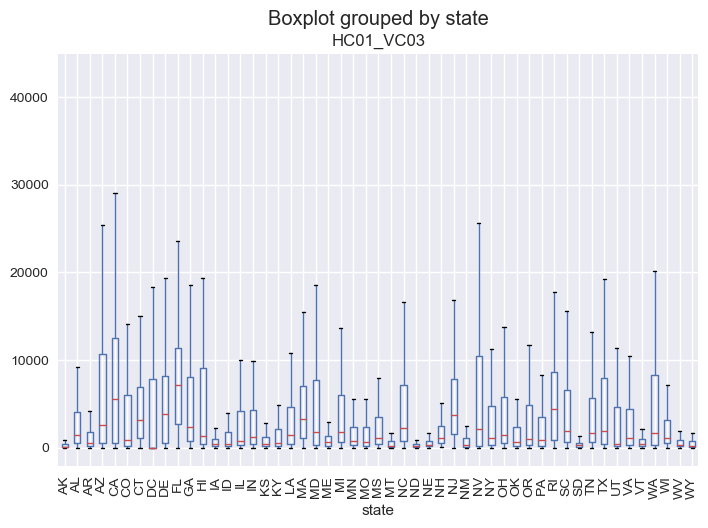

In [49]:
# create boxplot
df002.boxplot(column='HC01_VC03', by='state', rot=90)

plt.show()